https://www.kaggle.com/madhavms1/cat-dog-dl-classifc

In [25]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/Users/zhanghaisheng/study/imgs/cat_dog/training_set/training_set'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass
        
        

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
print(train_data)

In [27]:
training_set = train_data.flow_from_directory('/Users/zhanghaisheng/study/imgs/cat_dog/training_set/training_set', batch_size = 64, target_size = (64,64), class_mode = 'binary')
print(len(training_set))

Found 8005 images belonging to 2 classes.
126


In [28]:
test_data = ImageDataGenerator(rescale = 1./255)
testing_set = test_data.flow_from_directory('/Users/zhanghaisheng/study/imgs/cat_dog/test_set/test_set', batch_size = 64, target_size = (64,64), class_mode = 'binary')

Found 2023 images belonging to 2 classes.


4 steps of cnn
CONVOLUTION
POOLING
FLATTENING
FULL CONNECTION

In [29]:
cnn = tf.keras.models.Sequential()
#STEP - 1) ADDING CONVOLUTIONAL LAYER
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, input_shape = [64,64,3],activation = 'relu'))
#STEP - 2) APPLYING MAX POOLING
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#adding 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#adding 3rd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#STEP -3 ) FLATTENING
cnn.add(tf.keras.layers.Flatten())
#STEP - 4 ) FULL CONNECTION
#forming an ann with 128 input neurons
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
#adding ouput layer of the ann
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

compiling the CNN

In [30]:
#compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

training the model

In [32]:
#training the model
fitmodel = cnn.fit(x = training_set, validation_data = testing_set, epochs = 5)

Epoch 1/5
126/126 [==============================] - 36s 284ms/step - loss: 0.5081 - accuracy: 0.7493 - val_loss: 0.5919 - val_accuracy: 0.7148
Epoch 2/5
126/126 [==============================] - 40s 314ms/step - loss: 0.4909 - accuracy: 0.7621 - val_loss: 0.4826 - val_accuracy: 0.7622
Epoch 3/5
126/126 [==============================] - 41s 326ms/step - loss: 0.4790 - accuracy: 0.7668 - val_loss: 0.4617 - val_accuracy: 0.7919
Epoch 4/5
126/126 [==============================] - 41s 326ms/step - loss: 0.4564 - accuracy: 0.7816 - val_loss: 0.4349 - val_accuracy: 0.7944
Epoch 5/5
126/126 [==============================] - 42s 337ms/step - loss: 0.4468 - accuracy: 0.7859 - val_loss: 0.4509 - val_accuracy: 0.8013


In [33]:
#保存model
cnn.save('cat-dog-dl-classifc.h5')

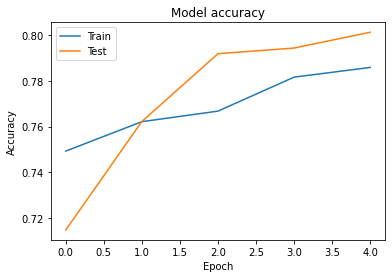

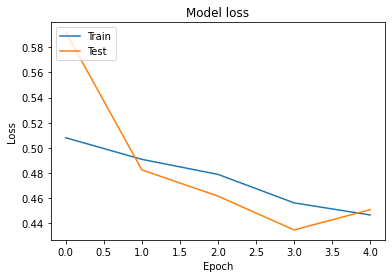

In [35]:
#训练历史可视化
#Keras Model 上的 fit() 方法返回一个 History 对象。
#History.history 属性是一个记录了连续迭代的训练/验证（如果存在）损失值和评估值的字典。
#这里是一个简单的使用 matplotlib 来生成训练/验证集的损失和准确率图表的例子：
import matplotlib.pyplot as plt
plt.plot(fitmodel.history['accuracy'])
plt.plot(fitmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(fitmodel.history['loss'])
plt.plot(fitmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
##应用模型 预测值
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
classifier = load_model('cat-dog-dl-classifc.h5')
print(classifier.summary())
print(training_set.class_indices)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

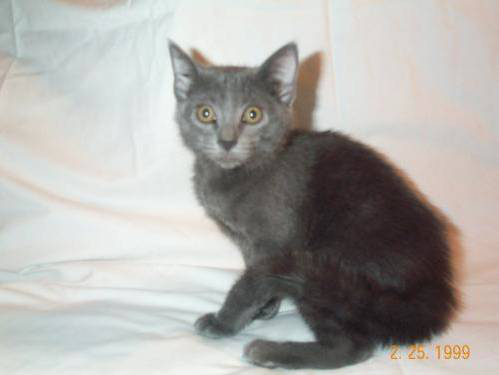

In [41]:
# 查看图片 
image.load_img('/Users/zhanghaisheng/study/imgs/cat_dog/test_set/test_set/cats/cat.4014.jpg')

In [43]:
# 验证一只猫
#importing images
test_img = image.load_img('/Users/zhanghaisheng/study/imgs/cat_dog/test_set/test_set/cats/cat.4014.jpg',target_size = (64,64))
#converting image to array
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis = 0)
result = classifier.predict(test_img)
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)


cat


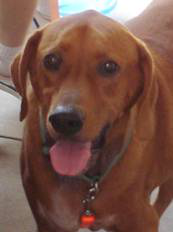

In [44]:
#查看图片
image.load_img('/Users/zhanghaisheng/study/imgs/cat_dog/test_set/test_set/dogs/dog.4014.jpg')

In [47]:
# 验证一只狗
# importing images
test_img = image.load_img('/Users/zhanghaisheng/study/imgs/cat_dog/test_set/test_set/dogs/dog.4014.jpg',target_size=(64,64))
# 把图片转成array
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis = 0)
# 验证
result = classifier.predict(test_img)
print(result)
print(print(training_set.class_indices))
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

[[1.]]
{'cats': 0, 'dogs': 1}
None
dog


In [50]:
# 验证一个从其他地方来的cat 

# importing images
test_img = image.load_img('/Users/zhanghaisheng/Downloads/cat111.jpeg',target_size=(64,64))
# 把图片转成array
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis = 0)
# 验证
result = classifier.predict(test_img)
print(result)
print(print(training_set.class_indices))
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

[[1.749673e-38]]
{'cats': 0, 'dogs': 1}
None
cat
